# Questions :
* ### ~~Comment choisir une couleur particulière dans une palette et l'affecter à une courbe, un histogramme etc.~~
* ### Comment afficher sur un histogramme, une courbe interpolée ?
* ### ~~Comment modifier l'ordre des couches sur un histogramme~~ 
* ### Comment afficher une distribution plutôt qu'un histogramme

# Exploratory Data Analysis: IBM attrition

In [38]:
# prelude
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

kGold     = 1.618
kWidth    = 12
kHeight   = kWidth/kGold
kWidthPx  = 1024
kHeightPx = kWidthPx/kGold

# Voir \12_assets\02_EDA\barbie_colors.png pour les couleurs
couleur_specifique = {
  'Male'  : '#2BADDE', 
  'Female': '#F2A9C7'
}

In [39]:
fig = px.colors.qualitative.swatches()
fig.show()

In [40]:
fig = px.colors.sequential.swatches_continuous()
fig.show()

In [41]:
# The dataset has 35 columns. Execute the cell below to avoid the columns to be truncated when displaying a table:
pd.options.display.max_columns = None

In [42]:
# Read the file IBM_HR_ATTRITION.csv:
df = pd.read_csv("../12_assets/02_EDA/IBM_HR_ATTRITION.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [43]:
# Use one line of code to display various statistics about the dataset:
df.describe(include="all").round(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470,1470,1470.00,1470,1470.00,1470.00,1470,1470.0,1470.00,1470.00,1470,1470.00,1470.00,1470.00,1470,1470.00,1470,1470.00,1470.00,1470.00,1470,1470,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.92,NaN,NaN,802.49,NaN,9.19,2.91,NaN,1.0,1024.87,2.72,NaN,65.89,2.73,2.06,NaN,2.73,NaN,6502.93,14313.10,2.69,NaN,NaN,15.21,3.15,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,NaN,NaN,403.51,NaN,8.11,1.02,NaN,0.0,602.02,1.09,NaN,20.33,0.71,1.11,NaN,1.10,NaN,4707.96,7117.79,2.50,NaN,NaN,3.66,0.36,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,NaN,NaN,102.00,NaN,1.00,1.00,NaN,1.0,1.00,1.00,NaN,30.00,1.00,1.00,NaN,1.00,NaN,1009.00,2094.00,0.00,NaN,NaN,11.00,3.00,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,NaN,NaN,465.00,NaN,2.00,2.00,NaN,1.0,491.25,2.00,NaN,48.00,2.00,1.00,NaN,2.00,NaN,2911.00,8047.00,1.00,NaN,NaN,12.00,3.00,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,NaN,NaN,802.00,NaN,7.00,3.00,NaN,1.0,1020.50,3.00,NaN,66.00,3.00,2.00,NaN,3.00,NaN,4919.00,14235.50,2.00,NaN,NaN,14.00,3.00,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,NaN,NaN,1157.00,NaN,14.00,4.00,NaN,1.0,1555.75,4.00,NaN,83.75,3.00,3.00,NaN,4.00,NaN,8379.00,20461.50,4.00,NaN,NaN,18.00,3.00,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00


In [44]:
# You can also use the .info() method to display some information about the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Who are IBM's employees?

### 6 - How are the ages distributed?

In [45]:
# We'll first focus on very basic questions about age, gender, education level, etc...
# How are the ages distributed?

fig = px.histogram(df, x="Age", color_discrete_sequence=px.colors.qualitative.Pastel, width=kWidthPx, height=kHeightPx)
fig.update_layout(title="Age histogram")
fig.update_layout(
    xaxis_title="Age (years)", 
    yaxis_title="Count"
)
fig.show()

In [46]:
fig = px.box(df, x="Age", color_discrete_sequence=px.colors.qualitative.Pastel, width=kWidthPx, height=kHeightPx)
fig.update_layout(title="Box analysis of ages")
fig.update_layout(
    xaxis_title="Age (years)", 
)
fig.show()


### 7 - Is the distribution of ages different for men and women? 
* Find __two ways__ of investigating the difference


In [47]:
tmp = df.groupby(["Age"])["Gender"].count()
tmp.head()

Age
18     8
19     9
20    11
21    13
22    16
Name: Gender, dtype: int64

In [48]:

# ! utiliser size() et pas count()
df_pivot = df.pivot_table(index='Age', columns='Gender', aggfunc='size')     
display(df_pivot)         
# print(df_pivot.head())
# print(type(df_pivot))
# print(df_pivot.columns)
# print(df_pivot.index)


Gender,Female,Male
Age,,
18,4.0,4.0
19,4.0,5.0
20,6.0,5.0
21,6.0,7.0
22,5.0,11.0
23,1.0,13.0
24,11.0,15.0
25,6.0,20.0
26,14.0,25.0


In [49]:

# Créer l'histogramme avec les couleurs spécifiques
# ! Attention au barmode, sinon les histogrammes sont empilés
# Essayer barmode = 'group' pour voir les données côte à côte
# Pour inverser l'ordre à l'affichage (Male devant, Female à l'arrière) il faut jouer sur l'ordre des colonnes du dataframe 
# Ici c'est pas possible car c'est histogram() qui reconstruit un DataFrame en fonction du genre et qui affiche (par ordre alphabétique?)
#   Faut soit tricher en renommant male et female
#   Faire son propre dataframe
fig = px.histogram(df, x="Age", color="Gender", color_discrete_map=couleur_specifique, barmode='overlay', width=kWidthPx, height=kHeightPx) 
fig.update_layout(title="Compare age distribution between men and women")
fig.update_layout(
    xaxis_title="Age (years)", 
    yaxis_title="Count"
)
fig.show()


In [50]:

# ! Bien voir que c'est plus un histogramme calculé par histogram() mais un graphe de type bar()
# aggfunc='size' et pas 'count'
df_pivot = df.pivot_table(index='Age', columns='Gender', aggfunc='size')
df_pivot = df_pivot[['Male', 'Female']]
fig = px.bar(df_pivot, barmode='overlay', opacity=0.8, color_discrete_map=couleur_specifique, width=kWidthPx, height=kHeightPx)
fig.update_layout(title="Compare age distribution between men and women")
fig.update_layout(
    xaxis_title="Age (years)", 
    yaxis_title="Count"
)
fig.show()



In [51]:
# ! Bien voir que c'est plus un histogramme calculé par histogram() mais un graphe de type bar()
df_pivot = df.pivot_table(index='Age', columns='Gender', aggfunc='size')
df_pivot = df_pivot[['Male', 'Female']]
# ! barmode='group'
fig = px.bar(df_pivot, barmode='group', color_discrete_map=couleur_specifique, width=kWidthPx, height=kHeightPx)
fig.update_layout(title="Compare age distribution between men and women")
fig.update_layout(
    xaxis_title="Age (years)", 
    yaxis_title="Count"
)
fig.show()


In [52]:
fig = px.violin(df, y="Age", color="Gender",
                violinmode='overlay',                                   # draw violins on top of each other
                hover_data=df.columns,
                box=True,
                color_discrete_map=couleur_specifique,
                width=kWidthPx, height=kHeightPx)
fig.update_layout(title="Compare age distribution between men and women")
fig.show()

### 8 - What are the different education levels proportions?


In [53]:
# What are the different education levels proportions?
(100*df.groupby(["Education"])["Age"].count()/len(df)).sort_values(ascending=False).round(2)                  # ! j'utilise "Age" mais c'est juste pour avoir 1 seule colonne

Education
3    38.91
4    27.07
2    19.18
1    11.56
5     3.27
Name: Age, dtype: float64

In [54]:
fig = px.pie(df, names = "Education", color_discrete_sequence=px.colors.qualitative.Pastel, width=kWidthPx, height=kHeightPx)
fig.update_layout(title="Breakdown by Education Level")
fig.show()

### 9- Same question for the education field?

In [55]:
# Same question for the education field?
(100*df.groupby(["EducationField"])["Age"].count()/len(df)).sort_values(ascending=False).round(2)

EducationField
Life Sciences       41.22
Medical             31.56
Marketing           10.82
Technical Degree     8.98
Other                5.58
Human Resources      1.84
Name: Age, dtype: float64

In [56]:
fig = px.pie(df, names = "EducationField", color_discrete_sequence=px.colors.qualitative.Pastel, width=kWidthPx, height=kHeightPx)
fig.update_layout(title="Breakdown by Education Level")
fig.show()

In [57]:
tmp = pd.DataFrame((100*df.groupby(["EducationField"])["Age"].count()/len(df)).sort_values(ascending=False))
tmp = tmp.rename(columns={"Age": 'As %'})
# print(tmp)

# Color scale voir : https://plotly.com/python/builtin-colorscales/
fig = px.bar(tmp, y="As %" , color="As %", color_continuous_scale="Viridis", width=kWidthPx, height=kHeightPx)
fig.update_layout(title="Breakdown by Education Level")
fig.show()

### 10 - What percentage of the employees never travel for business?

In [58]:
# What percentage of the employees never travel for business?
(100*df.groupby(["BusinessTravel"])["Age"].count()/len(df)).sort_values(ascending=False).round(2)

BusinessTravel
Travel_Rarely        70.95
Travel_Frequently    18.84
Non-Travel           10.20
Name: Age, dtype: float64

In [59]:
fig = px.pie(df, names = "BusinessTravel", color_discrete_sequence=px.colors.qualitative.Pastel, width=kWidthPx, height=kHeightPx)
fig.update_layout(title="Percentage of travellers")
fig.show()

In [60]:
tmp = ((100*(df["BusinessTravel"]=="Non-Travel").value_counts()/len(df)).sort_values(ascending=False))
tmp.index=["Travel", "Do not Travel"]

labels = tmp.index.tolist()
fig = px.pie(values=tmp, names = labels, color_discrete_sequence=px.colors.qualitative.Pastel, width=kWidthPx, height=kHeightPx)
fig.update_layout(title="Percentage of non travellers (from a Series)")
fig.show()

In [61]:
tmp = pd.DataFrame((100*(df["BusinessTravel"]=="Non-Travel").value_counts()/len(df)).sort_values(ascending=False)).reset_index()
tmp.index=["Travel", "Do not Travel"]
# print(tmp)

labels = tmp.index.tolist()
fig = px.pie(values=tmp["count"], names = labels, color_discrete_sequence=px.colors.qualitative.Pastel, width=kWidthPx, height=kHeightPx)
fig.update_layout(title="Percentage of non travellers (from a DataFrame)")
fig.show()

### 11 - What's the percentage of women?

In [62]:
# What's the percentage of women?
100*(df["Gender"]=="Female").value_counts()/len(df)

Gender
False    60.0
True     40.0
Name: count, dtype: float64

In [92]:
fig = px.pie(df, names = "Gender", color="Gender", color_discrete_map=couleur_specifique, width=kWidthPx, height=kHeightPx)
fig.update_layout(title="Percentage of women")
fig.show()

## Monthly Income

### 12 - As regards the income, is there equality between men and women?

In [64]:
# As regards the income, is there equality between men and women?

df.groupby(["Gender"])["MonthlyIncome"].mean().round(2)

Gender
Female    6686.57
Male      6380.51
Name: MonthlyIncome, dtype: float64

In [65]:
mean_monthly_income = df.groupby(["Gender"])["MonthlyIncome"].mean().reset_index()

fig = px.bar(mean_monthly_income, x="Gender", y="MonthlyIncome", color="Gender", color_discrete_map=couleur_specifique, width=kWidthPx, height=kHeightPx)
fig.update_layout(title="Mean of monthly income per gender")
fig.update_layout(
    yaxis_title="Monthly income ($)"
)
fig.show()

In [66]:
df.groupby(["Gender"])["MonthlyIncome"].describe(include='all').round(2)

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,588.0,6686.57,4695.61,1129.0,3037.0,5081.5,8711.75,19973.0
Male,882.0,6380.51,4714.86,1009.0,2819.5,4837.5,8113.75,19999.0


In [67]:
fig = px.box(df, x = "Gender", y = "MonthlyIncome", color="Gender", color_discrete_map=couleur_specifique, width=kWidthPx, height=kHeightPx)
fig.update_layout(showlegend=False)
fig.update_layout(title="Monthly income per gender")
fig.update_layout(
    yaxis_title="Monthly income ($)"
)
fig.show()

### Notes : 

* Pour regarder les différences entre hommes et femmes on peut aussi regarder ce type de graphe
* Z! pour l'instant c'est du Seaborn __PAS__ du Plotly

On y distingue :
* Les hommes des femmes
* On voit où se trouve le gros des troupes en terme de salaire et d'age
* À mon avis les salaires ont été capés à 20k/mois

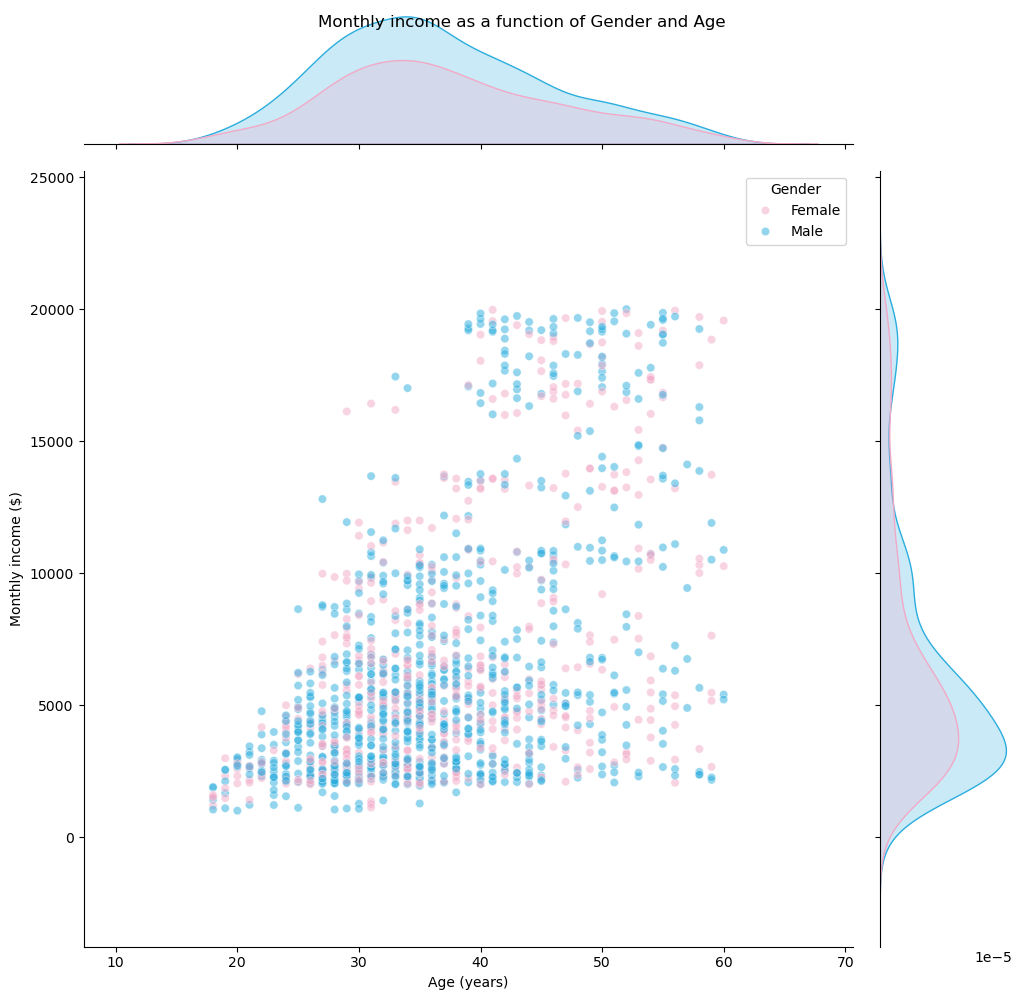

In [68]:
fig = sns.jointplot(df, x="Age", y="MonthlyIncome", alpha=.5, hue="Gender", palette=couleur_specifique, height=10.1) # ! voir le height réglé à la main... Misère de misère...
plt.suptitle("Monthly income as a function of Gender and Age")
plt.xlabel("Age (years)")
plt.ylabel("Monthly income ($)");

### Note : 
* J'arrive pas à sortir l'équivalent avec Plotly
* Je préfère le précédent

In [69]:
fig = px.scatter(df, x="Age", y="MonthlyIncome", color="Gender", trendline = "ols", color_discrete_map=couleur_specifique, marginal_x = "violin", marginal_y = "violin", width=kWidthPx, height=kHeightPx)
fig.update_layout(title="Monthly income as a function of Gender and Age")
fig.update_layout(
    xaxis_title="Age (years)", 
    yaxis_title="Monthly income ($)"
)
fig.show()

### 13 - Is the income correlated to the employee's age?

In [70]:
# Is the income correlated to the employee's age?

fig = px.scatter(df, x="Age", y="MonthlyIncome", color="Gender", trendline = "ols", color_discrete_map=couleur_specifique, width=kWidthPx, height=kHeightPx)
fig.update_layout(title="Monthly income as a function of age")
fig.update_layout(
    xaxis_title="Age (years)", 
    yaxis_title="Monthly income ($)"
)
fig.show()

In [71]:
# fig, ax = plt.subplots(figsize=(kWidth, kHeight))
# sns.pointplot(df, x="Age", y="MonthlyIncome", errorbar='se')

# ax.set_title("Monthly income as a function of age")
# ax.set_xlabel("Age (years)")
# _ = ax.set_ylabel("Monthly Income ($)")

In [72]:
df_tmp = pd.DataFrame(df.groupby(["Age"])["MonthlyIncome"].mean())
# print(df_tmp.head())
df_tmp["err"] = df.groupby(["Age"])["MonthlyIncome"].sem()
df_tmp.reset_index() # sinon on peut pas écrire x=df_tmp.index
# print(df_tmp.head())
fig = px.scatter(df_tmp, x=df_tmp.index, y="MonthlyIncome", error_y="err", color_discrete_sequence=px.colors.qualitative.Pastel, width=kWidthPx, height=kHeightPx)
fig.update_layout(title="Monthly income as a function of age")
fig.update_layout(
    xaxis_title="Age (years)", 
    yaxis_title="Monthly income ($)"
)
fig.show()

### Note

* Faut voir selon l'ancienneté
* Features TotalWorkingYears et YearsAtCompany

In [73]:
# fig, ax = plt.subplots(figsize=(kWidth,kHeight))
# sns.pointplot(df, x="YearsAtCompany", y="MonthlyIncome", errorbar='se')

# # ax.set_title("Monthly income as a function of Age")
# # ax.set_xlabel("Age (years)")
# # _ = ax.set_ylabel("Monthly Income ($)")

In [74]:
df_tmp = pd.DataFrame(df.groupby(["YearsAtCompany"])["MonthlyIncome"].mean())
df_tmp["err"] = df.groupby(["YearsAtCompany"])["MonthlyIncome"].sem()
df_tmp.reset_index() # sinon on peut pas écrire x=df_tmp.index

fig = px.scatter(df_tmp, x=df_tmp.index, y="MonthlyIncome", error_y="err", color_discrete_sequence=px.colors.qualitative.Pastel, width=kWidthPx, height=kHeightPx)
fig.update_layout(title="Monthly income as a function of seniority in the company")
fig.update_layout(
    xaxis_title="Years at company (years)", 
    yaxis_title="Monthly income ($)"
)
fig.show()

In [75]:
# fig, ax = plt.subplots(figsize=(kWidth,kHeight))
# sns.pointplot(df, x="TotalWorkingYears", y="MonthlyIncome", errorbar='se')

# # ax.set_title("Monthly income as a function of Age")
# # ax.set_xlabel("Age (years)")
# # _ = ax.set_ylabel("Monthly Income ($)")

In [76]:
df_tmp = pd.DataFrame(df.groupby(["TotalWorkingYears"])["MonthlyIncome"].mean())
df_tmp["err"] = df.groupby(["TotalWorkingYears"])["MonthlyIncome"].sem()
df_tmp.reset_index() # sinon on peut pas écrire x=df_tmp.index

fig = px.scatter(df_tmp, x=df_tmp.index, y="MonthlyIncome", error_y="err", color_discrete_sequence=px.colors.qualitative.Pastel, width=kWidthPx, height=kHeightPx)
fig.update_layout(title="Monthly income as a function years of experience")
fig.update_layout(
    xaxis_title="Total working years (years)", 
    yaxis_title="Monthly income ($)"
)
fig.show()

### 14 - Does the income depend on the education level?

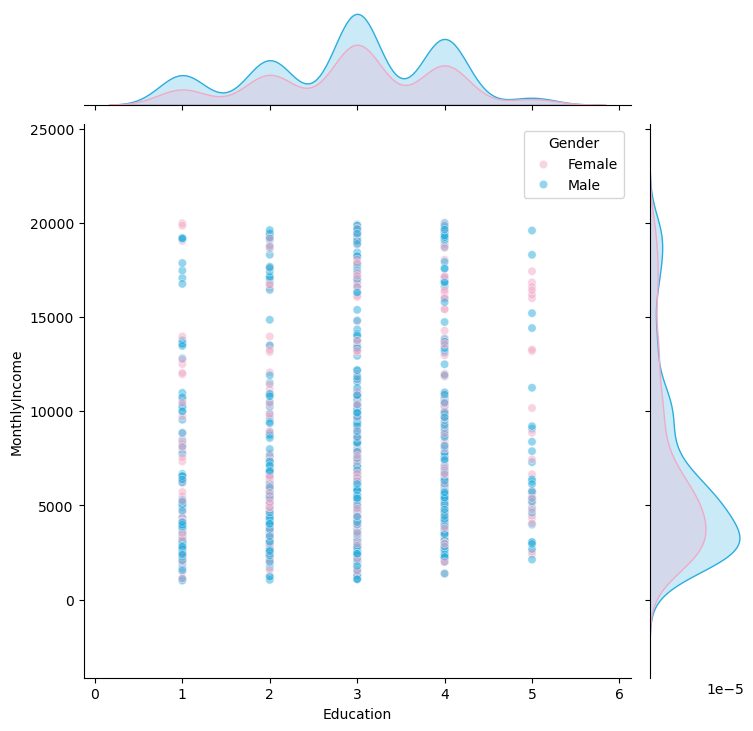

In [77]:
# Does the income depend on the education level?
# px.scatter(df, x="Education", y="MonthlyIncome", width=kWidthPx, height=kHeightPx)
_ = sns.jointplot(df, x="Education", y="MonthlyIncome", alpha=.5, hue="Gender", palette=couleur_specifique, height=kHeight)


* Non
* On peut faire 20k/mois avec level 1 ou 5


### 15 - Does the monthly income depend on the employee's frequency of travel?

In [78]:
# The income depends a bit on the education level, especially for highest level (5) who tend to earn more money than others.
# Does the monthly income depend on the employee's frequency of travel?

In [79]:
# fig, ax = plt.subplots(figsize=(kWidth, kHeight))
# sns.boxplot(df, x="BusinessTravel", y="MonthlyIncome", palette="coolwarm", hue="BusinessTravel", legend=False, ax=ax)
# ax.set_title("Income vs Business Travel");
# # ax.set_xlabel("Meal Time")
# # ax.set_ylabel("Total Bill ($)")


In [80]:

#  ! Pas de s à color="BusinessTravel"
fig = px.box(df, x="BusinessTravel", y="MonthlyIncome", color="BusinessTravel", color_discrete_sequence=px.colors.qualitative.Pastel, width=kWidthPx, height=kHeightPx)
fig.update_layout(showlegend=False)
fig.update_layout(title="Monthly income vs business travel frequency")
fig.update_layout(
    xaxis_title="Business Travel Frequency", 
    yaxis_title="Monthly income ($)"
)
fig.show()

### 16 - What is the education field with the highest incomes in general?


In [81]:
# # What is the education field with the highest incomes in general?
# # px.scatter(df, x="EducationField", y="MonthlyIncome", width=kWidthPx, height=kHeightPx)
# fig, ax = plt.subplots(figsize=(kWidth,kHeight))
# sns.boxplot(df, x="EducationField", y="MonthlyIncome", palette="coolwarm", hue="EducationField", legend=False, ax=ax)
# ax.set_title("Income vs Education")
# # ax.set_xlabel("Meal Time")
# # ax.set_ylabel("Total Bill ($)")


In [82]:
fig = px.box(df, x="EducationField", y="MonthlyIncome", color="EducationField", color_discrete_sequence=px.colors.qualitative.Pastel, width=kWidthPx, height=kHeightPx)
fig.update_layout(showlegend=False)
fig.update_layout(title="Monthly income vs education field")
fig.update_layout(
    xaxis_title="Education field", 
    yaxis_title="Monthly income ($)"
)
fig.show()

## Attrition

###  17 - What percentage of the employees did quit their job?

In [83]:
# Let's investigate the employees' attritions.
# What percentage of the employees did quit their job?

100*df.groupby(["Attrition"])["Age"].count()/len(df)

Attrition
No     83.877551
Yes    16.122449
Name: Age, dtype: float64

In [84]:
def newLegend(fig, newNames):
  newLabels = []
  for item in newNames:
    for i, elem in enumerate(fig.data[0].labels):
      if elem == item:
        newLabels.append(newNames[item])
  fig.data[0].labels = np.array(newLabels)
  return(fig)

couleurs = [px.colors.qualitative.Pastel[4], "#DC3912"]                     # ! Bien voir le mix entre couleur de la palette Pastel et une autre codée en dur

fig = px.pie(df, names = "Attrition", color_discrete_sequence=couleurs, width=kWidthPx, height=kHeightPx)
fig = newLegend(fig, {'No':'Do not quit', 'Yes': 'Quit'})
fig.update_layout(title="Percentage of people leaving the company")
fig.show()

### 18 - Could we anticipate an employee's attrition from his level of satisfaction in his job?

In [85]:
# Could we anticipate an employee's attrition from his level of satisfaction in his job?

# fig, ax = plt.subplots(figsize=(kWidth, kHeight))
# sns.boxplot(df, x="Attrition", y="JobSatisfaction", palette="coolwarm", hue="Attrition", legend=False, ax=ax)
# _ = ax.set_title("Job Satisfaction vs Attrition")



In [86]:
fig = px.box(df, x = "Attrition", y = "JobSatisfaction", color="Attrition", color_discrete_sequence=px.colors.qualitative.Pastel, width=kWidthPx, height=kHeightPx)
fig.update_layout(showlegend=False)
fig.update_layout(title="Employee's attrition vs job satisfaction")
fig.update_layout(
    xaxis_title="Attrition", 
    yaxis_title="Job satisfaction"
)
fig.show()

### 19 - Is this different between men and women?

In [87]:
# Is this different between men and women?

# fig, ax = plt.subplots(figsize=(kWidth, kHeight))
# sns.boxplot(df, x="Attrition", y="JobSatisfaction", palette="coolwarm", hue="Gender",  ax=ax)
# _ = ax.set_title("Job Satisfaction vs Attrition for Men & Women")


In [88]:
# fig = px.box(df, x = "Attrition", y = "JobSatisfaction", color = "Gender", color_discrete_sequence=px.colors.qualitative.Pastel, width=kWidthPx, height=kHeightPx)
fig = px.box(df, x = "Attrition", y = "JobSatisfaction", color = "Gender", color_discrete_map=couleur_specifique, width=kWidthPx, height=kHeightPx)

fig.update_layout(title="Employee's attrition vs job satisfaction per gender")
fig.update_layout(
    xaxis_title="Attrition", 
    yaxis_title="Job satisfaction"
)
fig.show()

### 20 - Now we would like to investigate the relationship between attrition and education field

In [89]:
# Now we would like to investigate the relationship between attrition and education field. 
# We can't proceed like the previous analyses, as attrition and education field are both categorical variables! 

# Let's do something else:
#     Convert the Attrition column such that "Yes" is mapped to 1 and "No" is mapped to 0
#     Then, compute the average of Attrition grouped by the education field
#     Finally, plot the average attrition as a function of the education field.
#     What is the education field with the highest attrition rate?

df["Attrition"] = df["Attrition"].apply(lambda x : 0 if x =="No" else 1)


In [90]:
tmp = pd.DataFrame(100*df.groupby(["EducationField"])["Attrition"].mean().sort_values())
fig = px.bar(tmp, color_discrete_sequence=px.colors.qualitative.Pastel, width=kWidthPx, height=kHeightPx)
fig.update_layout(showlegend=False)
fig.update_layout(title="Attrition % per education field")
fig.update_layout(
    xaxis_title="Education Field", 
    yaxis_title="As %"
)
fig.show()